<a href="https://colab.research.google.com/github/davidnoone/PHYS332_FluidExamples/blob/main/04_ColloidViscosity_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colloids and no-constant viscosity (1d case)

Colloids are a group of materials that include small particles emersen in a fluid (could be liquid or gas). Some examples include emulsions and gels, which emcompass substances like milk, whipped cream, styrofoam, jelly, and some glasses. 

We imagine a "pile" of substance that undergoes a viscous dissipation following a simple law. 

$$
  \frac{\partial h}{\partial t} =  \frac{\partial}{\partial x}
     \left( \nu \frac{\partial h}{\partial x} \right)
$$

where h is the depth of the colloidal material, and $\nu$ is the kinematic viscosity, at constant density. 

The viscosity follows a simple law:

$$
\nu = \nu_0 (1 + 2.5 \phi)
$$


where $\phi$ is the volume fraction. In the case that $\phi = \phi(h)$ some there are some non-linear consequences on the viscous flow. 


## Work tasks
1. Create a numerical model of viscous flow using finite differences. 
(Hint: You have basically done this in previous excersizes). 
2. Compute the height at a futute time under the null case where $\phi = 0$
3. Repeate the experiment for the case that $\phi$ has positive and negative values of a range of sizes. You may choose to assume $\phi = \pm h/h_{max}$, where $h_{max} $ is the maximum value of your initial "pile". 
4. Compare the results of your experiments. 


 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


The main component of this problem is developing an equation to calculate vicsous derivative using finite differences. Notice that unlike the previous case in which the viscosity is constant, here we must keep the viscosity within derivative estimates. We wish to evaluate the second grid on a discrete grid between 0 and 2$\pi$, with steps $\Delta x$ indicated by index $i = 0, N-1$. (Note python has arrays startning at index 0

Using a finite difference method, we can obtain scheme with second order accuracy as:

$$
\frac{\partial}{\partial x}
     \left( \nu \frac{\partial h}{\partial x} \right)=
     \frac{F_{i+1/2} - F_{i-1/2}}{(\Delta x)}
$$

where we have used fluxes $F$ at the "half" locations defined by 
$$
F_{i-1/2} = \nu_{i-1/2} (\frac{h_{i} - h_{i-1})}{\Delta x}
$$

and
$$
F_{i+1/2} = \nu_{i+1/2} (\frac{h_{i+1} - h_{i})}{\Delta x}
$$

Notice that $\nu$ needs to be determined at the "half" locations, which means that $h$ needs to be estimated at those points. It is easiest to assume it is the average of the values on either side. 

i.e., $h_{i-1/2} = 0.5(h_i + h_{i-1})$, and similarly for $h_{i+1/2}$. 


We are working with periodic boundary conditions so we may "wrap arround" such that $f_{-1} = f_{N-1}$ and $f_{N} = f_{1}$. You may choose to do this with python array indices, or take a look at the numpy finction [numpy.roll()](https://numpy.org/doc/stable/reference/generated/numpy.roll.html).


In [2]:
# Create a coordinate, which is periodix
npts = 50 
xvals = np.linspace(-math.pi,math.pi,npts)
dx = 2*math.pi/npts

hmax = 1.0      # maximum height of pile ["metres"]
vnu0 = 0.5      # reference viscosity [m2/sec]

# Define the an initial "pile" of substance: a gaussian
width = 3*dx
h = hmax*np.exp(-(xvals/width)**2)


Make a plot showing your initial vorticity: vorticity as a function of X

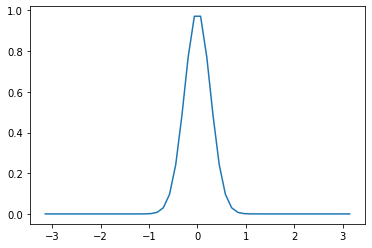

In [3]:
# PLot!
fig = plt.figure()
plt.plot(xvals,h)

Let's define a function to perform some number of time steps

In [4]:
def viscosity(h):
    global hmax
    phi = 0.
    phi = h/hmax  
    vnu = vnu0*(1 + 2.5*phi)
    return vnu

def forward_step(h_old, nsteps, dtime):
    for n in range(nsteps):

      dhdt = np.zeros_like(h_old)

      hmid = 0.5*(h_old + np.roll(h_old,+1))    # at indices i:nx1 = i-1/2 upward
      vmid = viscosity(hmid) 
      hflx = vmid*(h_old - np.roll(h_old,+1))/dx  
      dhdt = (np.roll(hflx,-1) - hflx)/dx       # hflx(i+1/2) - hflx(i-1/2)

      h_new = h_old + dtime*dhdt
      return h_new


Use your integration function to march forward in time to check the analytic result. Note, the time step must be small enough for a robust solution. It must be:

$$
\Delta t \lt \frac{(\Delta x)^2} {4 \eta}
$$



maximum allowed dtime is  0.007895683520871487   seconds


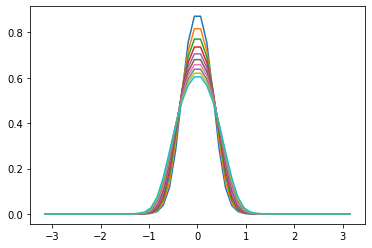

In [5]:
dt_max = 0.25*dx*dx/vnu0
print("maximum allowed dtime is ",dt_max,"  seconds")

dtime = 0.005
nsteps = 200


# step forward more steps, and plot again
nlines = 10
for iline in range(nlines):
    h = forward_step(h.copy(),nsteps,dtime)
    plt.plot(xvals,h)


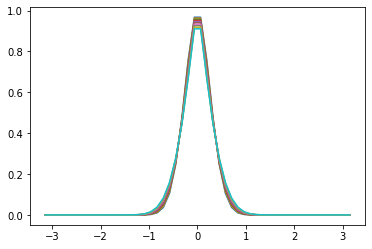

In [6]:
#Rerun with a different phi (redefine the viscosity function - but clumsy)
def viscosity(h):
    global hmax
    phi = -h/hmax   # Try this?
    vnu = vnu0*(1 + phi)
    return vnu


# step forward more steps, and plot again
h = hmax*np.exp(-(xvals/width)**2)
for iline in range(nlines):
    h = forward_step(h.copy(),nsteps,dtime)
    plt.plot(xvals,h)


#Results!

How did the shapes differ with thinning vs thickening?

